# 1. Installing collected packages of mnist

In [1]:
!pip install mnist

# 2. Importing the necessary Libraries

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sns
import pickle

In [30]:
# number of cores on my processor
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

# 3. Importing the dataset 

In [38]:
%%time
import mnist

Wall time: 0 ns


# 4. Making test and the training set

**We need to saperate the Independent and the dependent variables, X and y respectively.**
The matrix of 784 features are the independent variables (X) and the target labels corresponding to each image are the dependent variables (y).

**The MNIST dataset is divided in to 4 parts:**
- *X_train* : The dataset over which the model will be trained upon, it is a set of 60,000 greyscale images. Our Logistic Regression Algorithm will be trained over this data.
- *y_train* : This is the labelled dataset corresponding to the X_train, this contains the target labels corresponding to the Images of the dataset.
- *X_test* : This is the dataset kept aside to test the Machine Learning model trained upon the Dataset X_train, so that out model will have unseen data to predict and test upon.
- *y_test* : This is the labelled dataset corresponding to the X_train, this contains the target labels corresponding to the Images of the dataset.

### 4.1 Look at the data 

In [39]:
# definig the part of train and the one of test
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

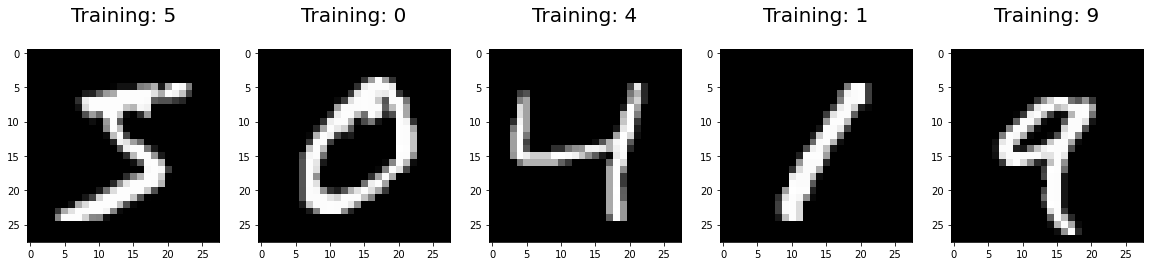

In [40]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


### 4.2 Transform the data 

In [41]:
# reshape the train set
X = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
y = train_labels

### 4.3 Splitting the data  

In [42]:
#Splitting Data into Training and Test Sets
#test_size = 0.20
#seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape) 

X_train shape :  (48000, 784)
X_test shape  :  (12000, 784)
y_train shape :  (48000,)
y_test shape  :  (12000,)


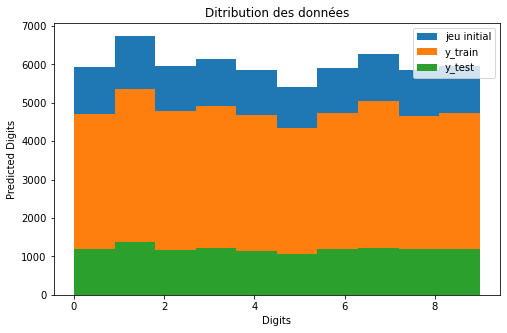

In [43]:
# data distribution after the splitting
plt.figure(figsize=(8,5))
plt.hist(y,label='jeu initial')
plt.hist(y_train,label='y_train')
plt.hist(y_test,label='y_test')
plt.xlabel("Digits")
plt.ylabel("Predicted Digits")
plt.title("Ditribution des données")
plt.legend()
plt.show()

# 5. Scaling 

In [44]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn import preprocessing
 
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#scaled_X_train = scaler.transform(X_train)
#print(scaled_X_train)

# 6. Training

In [56]:
# choosing the model and its parameters
# default solver is incredibly slow thats why we change it to lbfgs
model = LogisticRegression(solver='lbfgs', max_iter= 1000,  penalty='l2', n_jobs= -1)

In [57]:
# selecting the hyperparameters with GridSearchCV()
from sklearn.model_selection import GridSearchCV

# Set of parameters we want to try out for our model
# C : float, default=1,0 inverse de force de régularisation
#     doit être un flottant positif
#     des valeurs plus petites spécifient une régularisation plus forte.

param_grid_digits = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0] }
    

model_grid = GridSearchCV(model, param_grid=param_grid_digits, cv=3)

In [58]:
# training the model
model_grid.fit(X_train, y_train)
# best parameters


KeyboardInterrupt: 

In [52]:
%%time
model_grid.best_params_

Wall time: 0 ns


{'C': 0.0001}

# 7. Measuring Model Performance on train dataset¶

In [21]:
y_pred_train = model_grid.predict(X_train)

## 7.1 Confusion matrix on Train 

In [22]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[4619,    0,   11,    6,    8,   18,   20,    4,   28,    4],
       [   1, 5255,   23,   14,    5,   12,    1,   10,   35,    7],
       [  17,   30, 4451,   73,   36,   11,   30,   34,   93,   17],
       [  11,   10,   87, 4536,    5,  117,   13,   30,   80,   34],
       [   8,   15,   21,    6, 4445,    7,   25,    9,   31,  122],
       [  33,   11,   28,  129,   33, 3911,   55,    5,  110,   31],
       [  21,    7,   21,    0,   20,   40, 4596,    3,   18,    2],
       [   4,   15,   39,   14,   26,    2,    4, 4778,   20,  135],
       [  19,   55,   46,  107,   12,   91,   30,   18, 4238,   44],
       [  14,   15,    8,   49,   94,   24,    2,  114,   33, 4391]],
      dtype=int64)

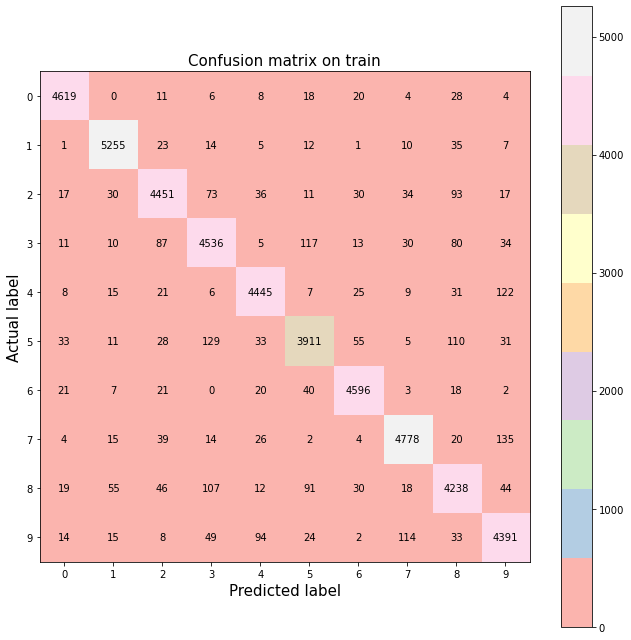

In [23]:
# visualisation of the train confusion matrix
plt.figure(figsize=(9,9))
plt.imshow(cm_train, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix on train', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm_train.shape
for x in range(width):
     for y in range(height):
        plt.annotate(str(cm_train[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

## 8.2 Measuring the accuracy of the train dataset 

In [24]:
from sklearn.metrics import accuracy_score
accuracy_train = round(accuracy_score(y_train, y_pred_train),2)
print(accuracy_train)

0.94


In [25]:
# save the model to disk
# wb indique que le fichier est ouvert pour écriture en mode binaire 
filename = 'finalized_model_grid.sav'
pickle.dump(model_grid, open(filename, 'wb'))

In [26]:
#filename = 'finalized_model_grid.sav'
#loaded_model_grid = pickle.load(open(filename, 'rb'))

In [27]:
# classification report of train dataset
def get_classification_report(y_train, y_pred_train):
    from sklearn.metrics import classification_report
    report = metrics.classification_report(y_train, y_pred_train, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    return round(df_classification_report,2)    

In [31]:
get_classification_report(y_train, y_pred_train)

,precision,recall,f1-score,support
0,0.97,0.98,0.98,4718.00
1,0.97,0.98,0.98,5363.00
2,0.94,0.93,0.93,4792.00
3,0.92,0.92,0.92,4923.00
4,0.95,0.95,0.95,4689.00
5,0.92,0.90,0.91,4346.00
6,0.96,0.97,0.97,4728.00
7,0.95,0.95,0.95,5037.00
8,0.90,0.91,0.91,4660.00
9,0.92,0.93,0.92,4744.00


# 9. Measuring Model Performance on the test dataset

accuracy (fraction of correct predictions): correct predictions / total number of data points

Basically, how the model performs on new data (test set)

## 9.1 Confusion Matrix on test

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [32]:
# Make predictions on test data
y_pred_test = model_grid.predict(X_test)

In [33]:
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[1167,    0,    4,    0,    2,    8,   12,    3,    8,    1],
       [   0, 1350,    4,    6,    1,    3,    0,    2,   10,    3],
       [   8,    9, 1036,   22,   13,    9,   17,   16,   31,    5],
       [   6,    4,   30, 1067,    2,   40,    2,    7,   35,   15],
       [   1,    5,    7,    1, 1068,    2,   19,    8,    5,   37],
       [  11,    3,   14,   37,   15,  919,   17,    6,   42,   11],
       [   8,    4,    9,    3,    8,   15, 1134,    3,    6,    0],
       [   2,    3,   10,    9,   11,    1,    0, 1142,    7,   43],
       [   9,   24,   14,   19,    8,   39,    8,    1, 1053,   16],
       [   5,    1,    5,   13,   32,    8,    0,   29,    6, 1106]],
      dtype=int64)

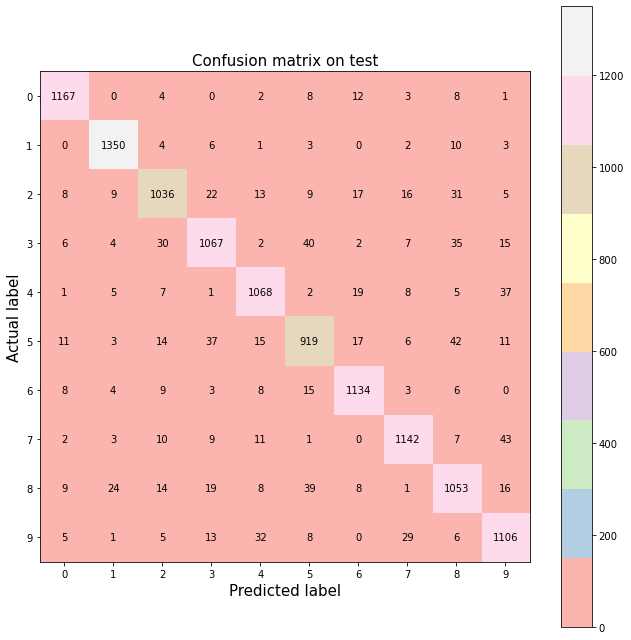

In [34]:
# visualisation of test confusion matrix
plt.figure(figsize=(9,9))
plt.imshow(cm_test, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix on test', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm_test.shape
for x in range(width):
     for y in range(height):
        plt.annotate(str(cm_test[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [35]:
# load the model from disk
# rb = Opening a file in ‘rb’ mode means that the file is opened for reading (r) in binary (b) mode
loaded_model_grid = pickle.load(open(filename, 'rb'))
accuracy_test = loaded_model_grid.score(X_test, y_test)
print(accuracy_test)

0.9201666666666667


In [36]:
#accuracy_test = model_grid.score(X_test, y_test)
#print(accuracy_test)

In [27]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)